In [ ]:
import pandas as pd

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [8]:
df = pd.read_csv("mushrooms.csv")

In [9]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [23]:
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1


In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [25]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,2,0,...,2,5,5,0,0,1,3,1,3,5
1,5,2,7,1,0,1,0,0,2,0,...,2,5,5,0,0,1,3,2,2,1
2,0,2,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,5,5,0,0,1,3,1,3,5
4,5,2,3,0,5,1,1,0,2,1,...,2,5,5,0,0,1,0,2,0,1


In [19]:
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [35]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [39]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [41]:
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.9982285208148804
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [43]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [47]:
nb_preds = nb_model.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

Naïve Bayes Accuracy: 0.7192205491585474
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       705
           1       0.93      0.27      0.42       424

    accuracy                           0.72      1129
   macro avg       0.81      0.63      0.62      1129
weighted avg       0.78      0.72      0.67      1129



In [3]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.1-cp312-cp312-macosx_11_0_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (21 kB)
  Using cached namex-0.1.0-py3-none-any.whl.me

In [49]:
import tensorflow as tf

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [53]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_resampled, y_train_resampled, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7514 - loss: 0.4910 - val_accuracy: 0.8636 - val_loss: 0.3144
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9551 - loss: 0.1419 - val_accuracy: 0.9874 - val_loss: 0.0707
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9870 - loss: 0.0680 - val_accuracy: 0.9937 - val_loss: 0.0344
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9947 - loss: 0.0356 - val_accuracy: 0.9955 - val_loss: 0.0209
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9986 - loss: 0.0176 - val_accuracy: 0.9982 - val_loss: 0.0081
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9993 - loss: 0.0120 - val_accuracy: 0.9982 - val_loss: 0.0066
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.9997 - loss: 0.0071 - val_accuracy: 0.9982 - val_loss: 0.0067
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9995 - loss: 0.0055 - va

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from sklearn.metrics import confusion_matrix

In [61]:
dnn_preds = (model.predict(X_test) > 0.5).astype("int32")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


In [63]:
print("DNN Accuracy:", accuracy_score(y_test, dnn_preds))
print(classification_report(y_test, dnn_preds))

DNN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



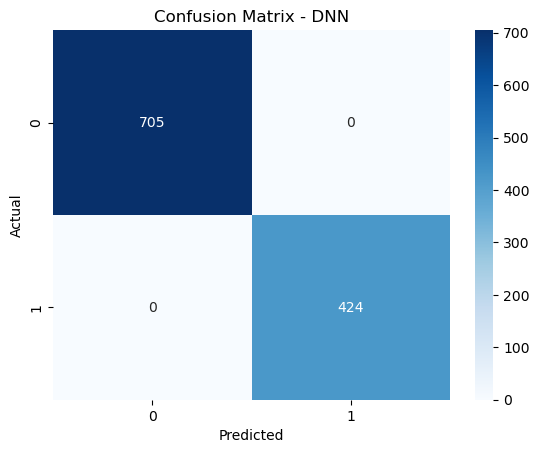

In [83]:
cm = confusion_matrix(y_test, dnn_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - DNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("dnn_confusion_matrix.png")
plt.show()

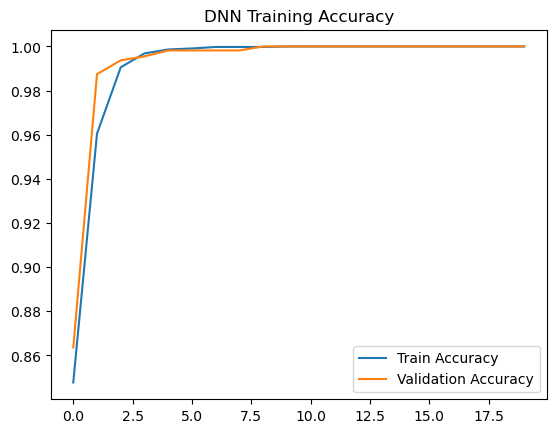

In [89]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("DNN Training Accuracy")
plt.legend()
plt.savefig("dnn_training_curves.png")
plt.show()

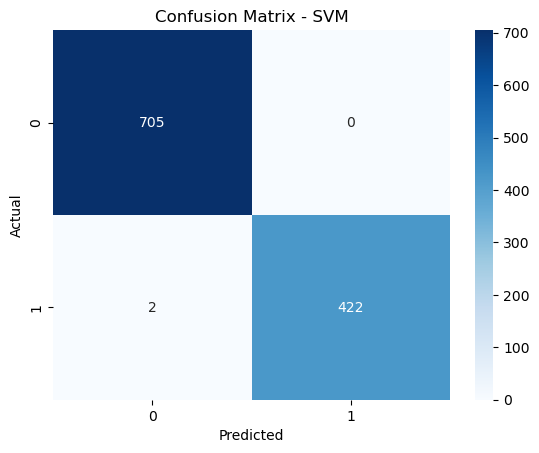

In [87]:
cm = confusion_matrix(y_test, svm_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("svm_confusion_matrix.png");
plt.show()

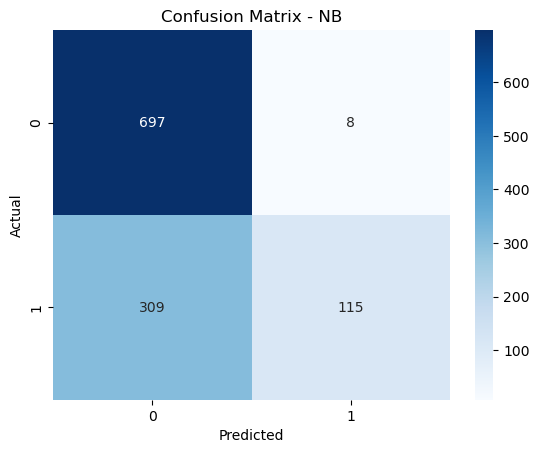

In [85]:
cm = confusion_matrix(y_test, nb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("nb_confusion_matrix.png")
plt.show()